<a href="https://colab.research.google.com/github/TianyiFan30/CS491/blob/main/ParsingBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialize things

In [1]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

import graphviz

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [3]:
# Function to convert NLTK tree to graphviz source
def to_graphviz(tree):
    dot = graphviz.Digraph(comment='Parse Tree')

    def add_nodes_edges(tree, dot, parent_index=None, index=0):
        node_index = index
        if isinstance(tree, nltk.Tree):
            node_label = tree.label()
            dot.node(str(node_index), node_label)
            if parent_index is not None:
                dot.edge(str(parent_index), str(node_index))
            for child in tree:
                index += 1
                index = add_nodes_edges(child, dot, node_index, index)
        else:
            # Leaf node
            dot.node(str(index), str(tree))
            if parent_index is not None:
                dot.edge(str(parent_index), str(index))
        return index

    add_nodes_edges(tree, dot)
    return dot


# Convert tree to graphviz source and display



In [4]:
sent = 'I saw the man with the telescope'

# sentences and grammars: chunking


In [5]:

grammar = """
    GERUND_PHRASE: {<VBG><NNS>}                # Gerund Phrase
    NP: {<DT>?<JJ>*<NNS>}                      # Noun Phrase
    VP: {<MD><VB><JJ>}                         # Verb Phrase for modal verbs
    ADJP: {<RB>*<JJ>}                          # Adjective Phrase
    NP: {<DT>?<JJ>*<NN.*>}
    VP: {<V.*><.*>?<VP>?}
"""

parser = nltk.RegexpParser(grammar)

In [7]:
#  Tokenizing and tagging
tokens = nltk.word_tokenize(sent)
tagged = nltk.pos_tag(tokens)
print(f'tokens are {tokens}')
print(f'POS tags are {tagged}')

tokens are ['I', 'saw', 'the', 'man', 'with', 'the', 'telescope']
POS tags are [('I', 'PRP'), ('saw', 'VBD'), ('the', 'DT'), ('man', 'NN'), ('with', 'IN'), ('the', 'DT'), ('telescope', 'NN')]


In [8]:
# Create tree
tree = parser.parse(tagged)
print(tree)

(S I/PRP saw/VBD the/DT man/NN with/IN the/DT telescope/NN)


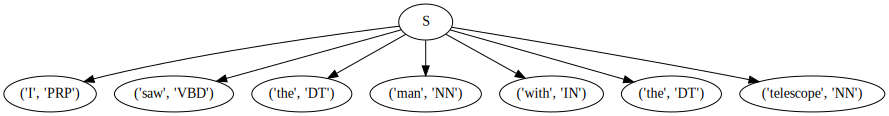

In [18]:
dot_source1 = to_graphviz(tree)
display(dot_source1)

# Adjusting "The quick brown fox jumped over the lazy dog."

The tagger incorrectly identifies "brown" as a noun.

In [19]:
# prompt: replace ('brown', 'NN') with  ('brown', 'JJ") in tagged
for i, (word, tag) in enumerate(tagged):
  if tagged[i][0] == 'saw':
        tagged_alt = tagged.copy()
        tagged_alt[i] = ('saw', 'JJ')
        break

In [20]:
tagged_alt

[('I', 'PRP'),
 ('saw', 'JJ'),
 ('the', 'DT'),
 ('man', 'NN'),
 ('with', 'IN'),
 ('the', 'DT'),
 ('telescope', 'NN')]

In [21]:
# Create tree
tree_alt = parser.parse(tagged_alt)
print(tree_alt)

(S I/PRP (ADJP saw/JJ) the/DT man/NN with/IN the/DT telescope/NN)


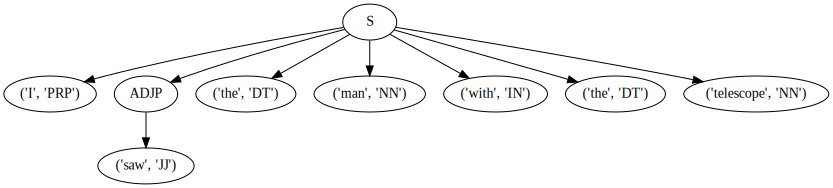

In [22]:
dot_source_alt = to_graphviz(tree_alt)
display(dot_source_alt)

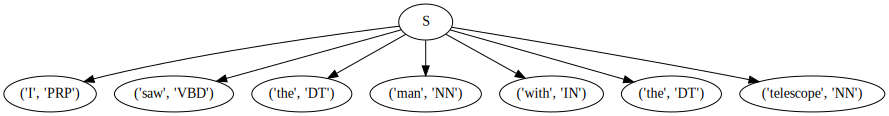

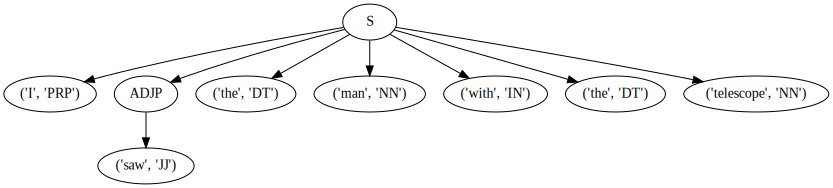

In [23]:
display(dot_source1)
display(dot_source_alt)

# Adjusting "They can fish."
We want to adjust the tagging so that we get the meaning of "a group of people who put fish into cans."

In [ ]:
# prompt: In tagged replace the POS for "can" to be a verb and the POS for "fish" to be a noun

for i, (word, tag) in enumerate(tagged):
  if word == 'can' and tag == 'MD':
    tagged[i] = ('can', 'VB')
  if word == 'fish' and tag == 'VB':
    tagged[i] = ('fish', 'NN')

print(tagged)


[('They', 'PRP'), ('can', 'VB'), ('fish', 'NN'), ('.', '.')]


In [ ]:
#  Create tree
tree = parser.parse(tagged)
print(tree)

(S They/PRP (VP can/VB (NP fish/NN)) ./.)


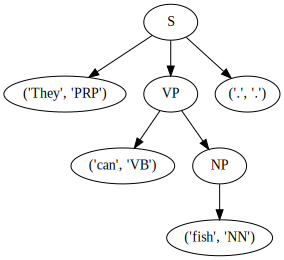

In [ ]:
dot_source = to_graphviz(tree)
display(dot_source)

# Context Free Grammars

In [ ]:
groucho_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")

In [ ]:
groucho_grammar

<Grammar with 13 productions>

In [ ]:
type(groucho_grammar)

nltk.grammar.CFG

In [ ]:
groucho_grammar.start()

S

In [ ]:
groucho_grammar.productions()

[S -> NP VP,
 PP -> P NP,
 NP -> Det N,
 NP -> Det N PP,
 NP -> 'I',
 VP -> V NP,
 VP -> VP PP,
 Det -> 'an',
 Det -> 'my',
 N -> 'elephant',
 N -> 'pajamas',
 V -> 'shot',
 P -> 'in']

In [ ]:
from nltk.grammar import *
groucho_grammar.productions(lhs=Nonterminal("NP"))

[NP -> Det N, NP -> Det N PP, NP -> 'I']

In [ ]:
groucho_grammar.productions(rhs=Nonterminal("Det"))

[NP -> Det N, NP -> Det N PP]

In [ ]:
pp = groucho_grammar.productions(rhs=Nonterminal("Det"))
pp[0]

NP -> Det N

In [ ]:
pp[0].lhs()

NP

In [ ]:
pp[0].rhs()

(Det, N)

In [ ]:
sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ChartParser(groucho_grammar)
trees = list(parser.parse(sent))

In [ ]:
print(trees[0])

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))


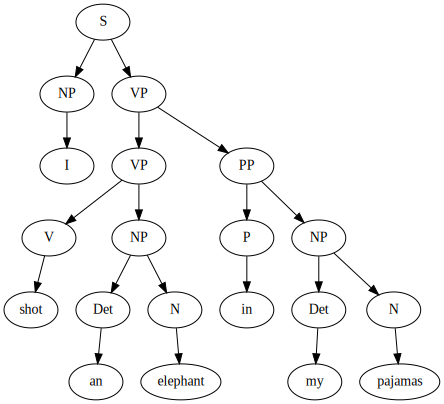

In [ ]:
dot_source = to_graphviz(trees[0])
display(dot_source)

In [ ]:
print(trees[1])

(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


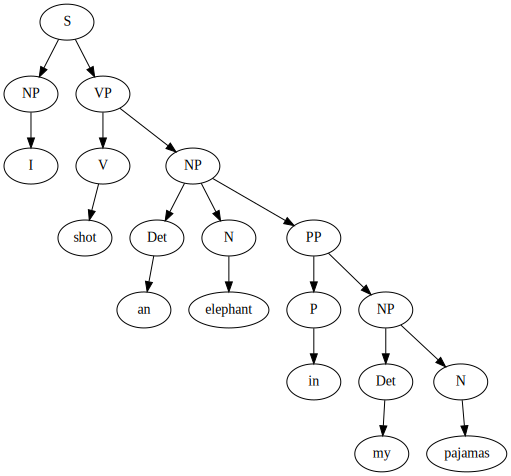

In [ ]:
dot_source = to_graphviz(trees[1])
display(dot_source)